In [97]:
import pandas as pd
data = pd.read_csv('loanapproval.csv', index_col='applicant_id')
data.head(2)

,age,gender,marital_status,annual_income,loan_amount,credit_score,num_dependents,existing_loans_count,employment_status,loan_approved
applicant_id,,,,,,,,,,
1,59,Male,Divorced,100073,7169,793,1,1,Unemployed,1
2,49,Male,Married,112197,23556,789,0,2,Employed,1


In [98]:
data.columns

Index(['age', 'gender', 'marital_status', 'annual_income', 'loan_amount',
       'credit_score', 'num_dependents', 'existing_loans_count',
       'employment_status', 'loan_approved'],
      dtype='object')

In [99]:
features = ['age', 'gender', 'marital_status', 'annual_income',
       'loan_amount', 'credit_score', 'num_dependents', 'existing_loans_count',
       'employment_status']
X = data[features]
Y = data['loan_approved']

In [100]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2)

In [101]:
categorical_cols = [i for i in train_X.columns if train_X[i].dtype == 'object' and train_X[i].nunique() < 10]
numerical_cols = [i for i in train_X.columns if train_X[i].dtypes in ['int64', 'float64']]
my_cols = categorical_cols + numerical_cols
train_X = train_X[my_cols].copy()
test_X = test_X[my_cols].copy()

In [102]:
from sklearn.feature_selection import mutual_info_classif
def mi_info(X, Y, discrete_features):
    mi_scores = mutual_info_classif(X, Y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name='mutual info', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [103]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
X = train_X
Y = train_Y
X = imp.fit_transform(X)
X = pd.DataFrame(X, columns=my_cols)

In [104]:
for i in X.select_dtypes('object'):
    X[i], _ = X[i].factorize()

discrete_features = X.dtypes == int

In [ ]:
mi_scores = mi_info(X, Y, discrete_features)  
mi_scores[::3] 

annual_income     0.577760
num_dependents    0.100519
age               0.021992
Name: mutual info, dtype: float64

In [106]:
import matplotlib.pyplot as plt
def mi_fig(mi_scores):
    ...

Text(0.5, 0, 'wau')

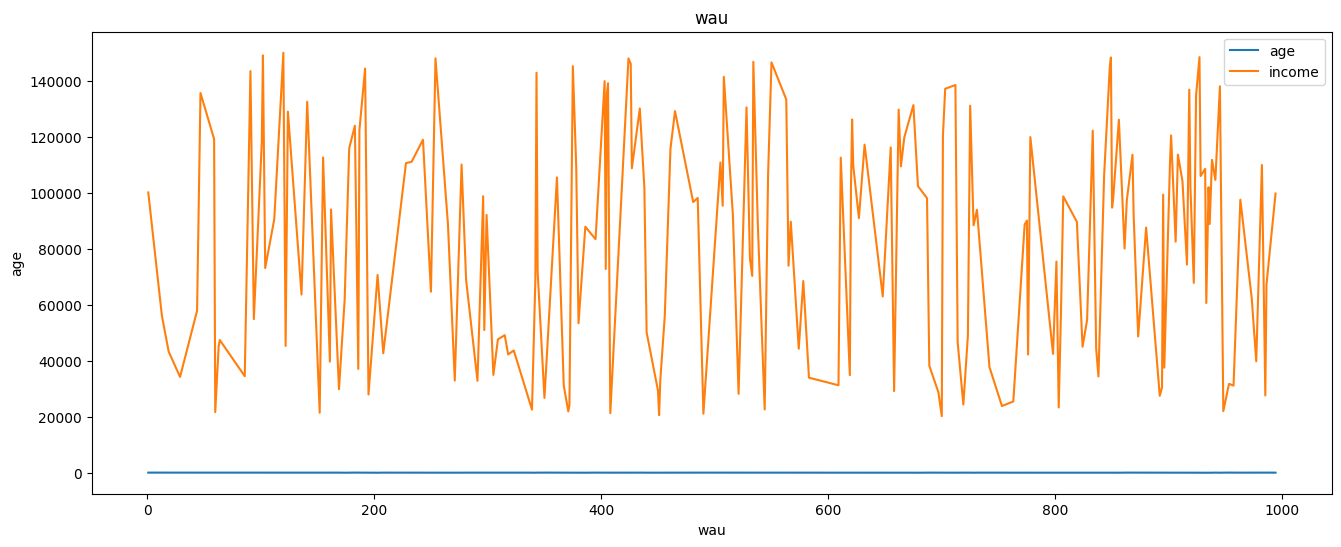

In [107]:
import seaborn as sns
plt.figure(figsize=(16,6))
plt.title("wau")
sns.lineplot(data = test_X['age'], label = 'age')
sns.lineplot(data = test_X['annual_income'], label = 'income')
plt.xlabel('wau')

Text(0.5, 80.5815972222222, 'wau')

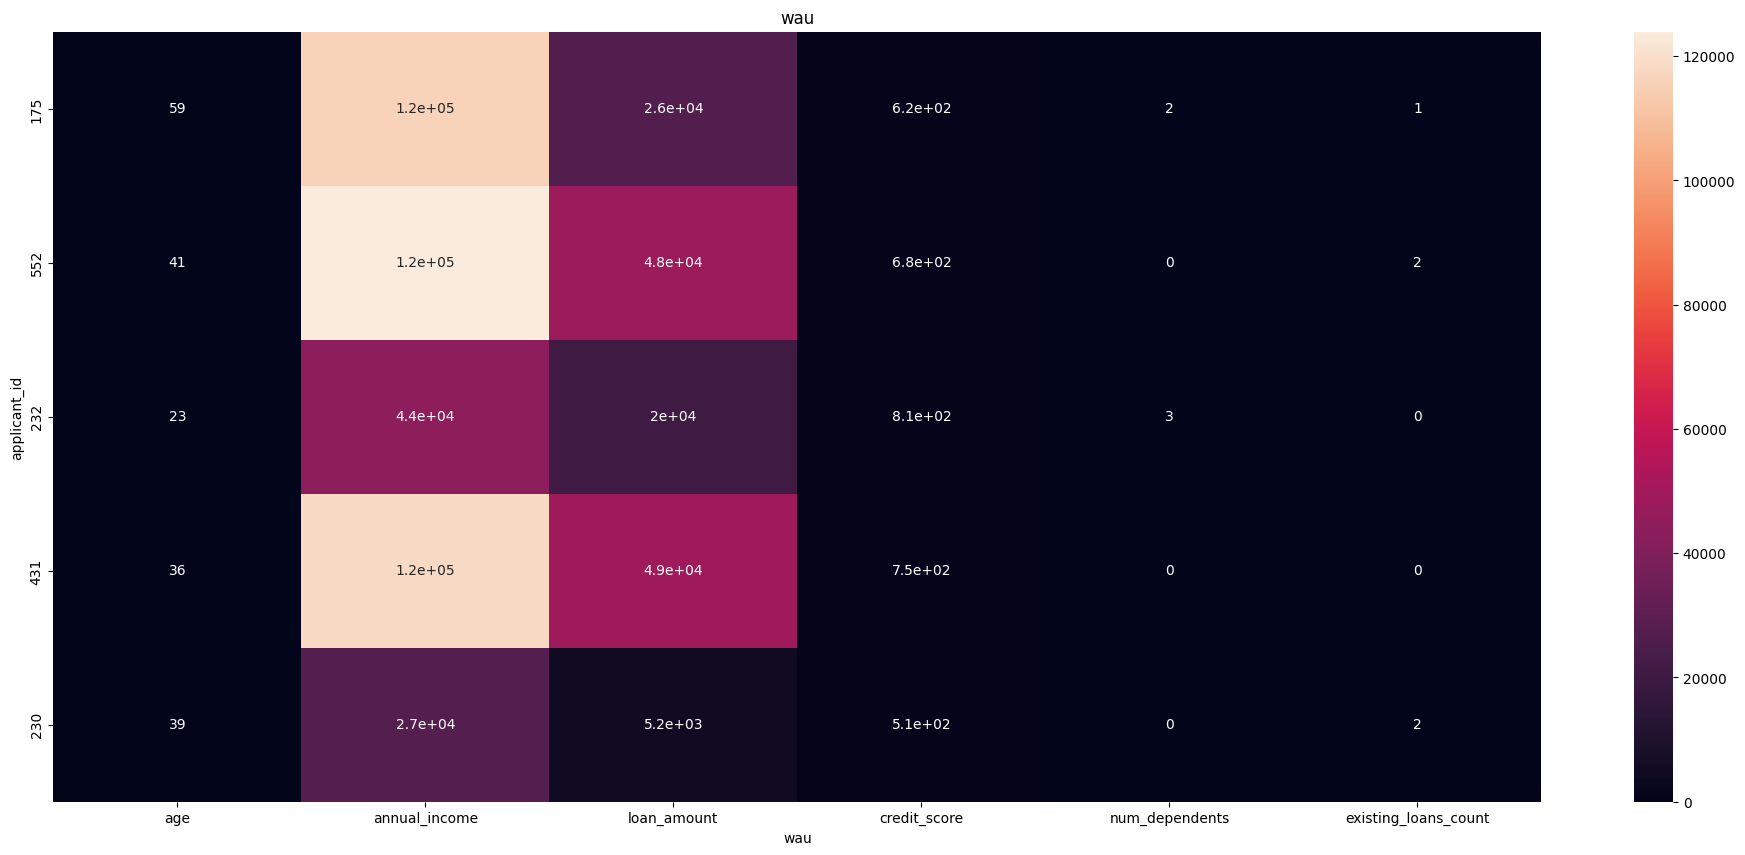

In [116]:
plt.figure(figsize=(24,10))
plt.title('wau')
sns.heatmap(data=train_X[numerical_cols].head(5), annot=True)
plt.xlabel('wau')